# **IMPORTS**

In [1]:
# install requirements
# pip install -r requirements

In [77]:
import cv2
import os
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense
from tensorflow.keras.metrics import Accuracy, Precision, Recall, AUC, FalsePositives, FalseNegatives




# **GDRIVE CONNECT**

# **IMAGE PROCESS**

In [3]:

def load_images_and_labels(data_dir,label):
    images = []
    labels = []

    # Iterate through files in the data directory
    for filename in os.listdir(data_dir):
        # Read the image
        image_path = os.path.join(data_dir, filename)
        image = cv2.imread(image_path)
        print(image_path)
        if image is not None:
            # Preprocess the image (resize, normalize, etc.)
            image = cv2.resize(image, (100, 100))
            image = image / 255.0  # Normalize pixel values
            # image = np.expand_dims(image, axis=0)
            images.append(image)
            # Add label (assuming all images are cheetah)
            labels.append(label)  # One-hot encoding for "cheetah" label
      # Convert labels to one-hot encoding
    return np.array(images), np.array(labels)

# Path to the directory containing the images
# cheetah_label = [0, 0]
# hyena_label = [1, 0]
# jaguar_label = [0, 1]
# tiger_label = [1, 1]






# **Data Processing**

Labels

In [41]:
hyena_label= [1, 0, 0]
cheetah_label= [0, 1, 0]
jaguar_label = [1, 1, 0]
tiger_label = [0, 0, 1]

Testing Data

In [42]:
# Load images and labels for each class
cheetah_images, cheetah_labels = load_images_and_labels('data/cheetah_train_resized', cheetah_label)
hyena_images, hyena_labels = load_images_and_labels('data/hyena_train_resized', hyena_label)
jaguar_images, jaguar_labels = load_images_and_labels('data/jaguar_train_resized', jaguar_label)
tiger_images, tiger_labels = load_images_and_labels('data/tiger_train_resized', tiger_label)

data/cheetah_train_resized\cheetah_000_resized.jpg
data/cheetah_train_resized\cheetah_001_resized.jpg
data/cheetah_train_resized\cheetah_002_resized.jpg
data/cheetah_train_resized\cheetah_003_resized.jpg
data/cheetah_train_resized\cheetah_004_resized.jpg
data/cheetah_train_resized\cheetah_005_resized.jpg
data/cheetah_train_resized\cheetah_006_resized.jpg
data/cheetah_train_resized\cheetah_007_resized.jpg
data/cheetah_train_resized\cheetah_008_resized.jpg
data/cheetah_train_resized\cheetah_009_resized.jpg
data/cheetah_train_resized\cheetah_010_resized.jpg
data/cheetah_train_resized\cheetah_011_resized.jpg
data/cheetah_train_resized\cheetah_012_resized.jpg
data/cheetah_train_resized\cheetah_013_resized.jpg
data/cheetah_train_resized\cheetah_014_resized.jpg
data/cheetah_train_resized\cheetah_015_resized.jpg
data/cheetah_train_resized\cheetah_016_resized.jpg
data/cheetah_train_resized\cheetah_017_resized.jpg
data/cheetah_train_resized\cheetah_018_resized.jpg
data/cheetah_train_resized\chee

data/cheetah_train_resized\cheetah_153_resized.jpg
data/cheetah_train_resized\cheetah_154_resized.jpg
data/cheetah_train_resized\cheetah_155_resized.jpg
data/cheetah_train_resized\cheetah_156_resized.jpg
data/cheetah_train_resized\cheetah_157_resized.jpg
data/cheetah_train_resized\cheetah_158_resized.jpg
data/cheetah_train_resized\cheetah_159_resized.jpg
data/cheetah_train_resized\cheetah_160_resized.jpg
data/cheetah_train_resized\cheetah_161_resized.jpg
data/cheetah_train_resized\cheetah_162_resized.jpg
data/cheetah_train_resized\cheetah_163_resized.jpg
data/cheetah_train_resized\cheetah_164_resized.jpg
data/cheetah_train_resized\cheetah_165_resized.jpg
data/cheetah_train_resized\cheetah_166_resized.jpg
data/cheetah_train_resized\cheetah_167_resized.jpg
data/cheetah_train_resized\cheetah_168_resized.jpg
data/cheetah_train_resized\cheetah_169_resized.jpg
data/cheetah_train_resized\cheetah_170_resized.jpg
data/cheetah_train_resized\cheetah_171_resized.jpg
data/cheetah_train_resized\chee

Validation Data

In [61]:
cheetah_images_validation, cheetah_labels_validation = load_images_and_labels('data/cheetah_validation_resized',cheetah_label)
hyena_images_validation, hyena_labels_validation = load_images_and_labels('data/hyena_validation_resized',hyena_label)
jaguar_images_validation, jaguar_labels_validation = load_images_and_labels('data/jaguar_validation_resized',jaguar_label)
tiger_images_validation, tiger_labels_validation = load_images_and_labels('data/tiger_train_resized',tiger_label)


data/cheetah_validation_resized\cheetah_000_val_resized.jpg
data/cheetah_validation_resized\cheetah_001_val_resized.jpg
data/cheetah_validation_resized\cheetah_002_val_resized.jpg
data/cheetah_validation_resized\cheetah_003_val_resized.jpg
data/cheetah_validation_resized\cheetah_004_val_resized.jpg
data/cheetah_validation_resized\cheetah_005_val_resized.jpg
data/cheetah_validation_resized\cheetah_006_val_resized.jpg
data/cheetah_validation_resized\cheetah_007_val_resized.jpg
data/cheetah_validation_resized\cheetah_008_val_resized.jpg
data/cheetah_validation_resized\cheetah_009_val_resized.jpg
data/cheetah_validation_resized\cheetah_010_val_resized.jpg
data/cheetah_validation_resized\cheetah_011_val_resized.jpg
data/cheetah_validation_resized\cheetah_012_val_resized.jpg
data/cheetah_validation_resized\cheetah_013_val_resized.jpg
data/cheetah_validation_resized\cheetah_014_val_resized.jpg
data/cheetah_validation_resized\cheetah_015_val_resized.jpg
data/cheetah_validation_resized\cheetah_

Concatenating Testing Datas

In [44]:
training_images = np.concatenate([cheetah_images, hyena_images, jaguar_images, tiger_images], axis=0)
training_labels = np.concatenate([cheetah_labels, hyena_labels, jaguar_labels, tiger_labels], axis=0)

In [45]:
validation_images = np.concatenate([cheetah_images_validation,hyena_images_validation,jaguar_images_validation,tiger_images_validation])
validation_labels = np.concatenate([cheetah_labels_validation,hyena_labels_validation,jaguar_labels_validation,tiger_labels_validation])


Concatenating Validation Datas

In [9]:
print("Cheetah images shape:", training_images.shape)
print("Hyena images shape:", training_labels.shape)
print("Jaguar images shape:", validation_images.shape)
print("Tiger images shape:", validation_labels.shape)

Cheetah images shape: (3600, 100, 100, 3)
Hyena images shape: (3600, 3)
Jaguar images shape: (1200, 100, 100, 3)
Tiger images shape: (1200, 3)


# **Building Model**

Build model




In [10]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

# Define callbacks
# checkpoint = ModelCheckpoint("model.h5", monitor="val_loss", verbose=1, save_best_only=True, mode="min")
early_stop = EarlyStopping(monitor="val_loss", patience=5, mode="min", verbose=1)


model = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(100, 100, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(500, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    # Dense(3, activation='')  # Sigmoid activation for multi-label classification
])

c:\Users\winso\Documents\GitHub\Machine-Learning-Classification\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [36]:
nodel = load_model('classification_model.h5')

Compile model

In [99]:
# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',  # Binary cross-entropy loss for multi-label classification
            # metrics=['accuracy',  Precision(), Recall(), FalsePositives(), FalseNegatives()],
            metrics=['accuracy', 'precision', 'recall', 'f1_score'],
              # metrics=['accuracy'],
              )
              

Train model

In [100]:
# Train the model
history = model.fit(training_images, training_labels, epochs=5,
                    validation_data=(validation_images, validation_labels),
                    # callbacks=[checkpoint, early_stop]
                    callbacks=[ early_stop]
                    )

Epoch 1/5
113/113 ━━━━━━━━━━━━━━━━━━━━ 10s 65ms/step - accuracy: 0.8375 - f1_score: 0.9103 - loss: 0.0276 - precision: 0.9893 - recall: 0.9899 - val_accuracy: 0.9625 - val_f1_score: 0.8747 - val_loss: 0.0782 - val_precision: 0.9808 - val_recall: 0.9800
Epoch 2/5
113/113 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - accuracy: 0.8472 - f1_score: 0.9072 - loss: 0.0066 - precision: 0.9957 - recall: 0.9979 - val_accuracy: 0.9108 - val_f1_score: 0.8689 - val_loss: 0.0612 - val_precision: 0.9860 - val_recall: 0.9746
Epoch 3/5
113/113 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - accuracy: 0.8133 - f1_score: 0.9055 - loss: 0.0031 - precision: 0.9984 - recall: 0.9980 - val_accuracy: 0.9192 - val_f1_score: 0.8777 - val_loss: 0.0542 - val_precision: 0.9831 - val_recall: 0.9838
Epoch 4/5
113/113 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - accuracy: 0.8206 - f1_score: 0.9099 - loss: 1.9458e-04 - precision: 1.0000 - recall: 1.0000 - val_accuracy: 0.9250 - val_f1_score: 0.8866 - val_loss: 0.0600 - val_precision: 0.9861 - val_re

Save model

In [14]:

# Save the trained model
model.save('classification_model.h5',include_optimizer=True)
# model.save('classification_model.keras')

In [96]:

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 98, 98, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 49, 49, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 47, 47, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 21, 21, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 2, 2, 500)      │       576,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 1, 1, 500)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 500)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        64,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,215,367 (8.45 MB)

 Trainable params: 738,455 (2.82 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,476,912 (5.63 MB)

# **Evaluation**

Accuracy for each animals

In [ ]:

images = ['cheetah_images_validation', 'hyena_images_validation', 'jaguar_images_validation', 'tiger_images_validation']
labels = ['cheetah_labels_validation', 'hyena_labels_validation', 'jaguar_labels_validation', 'tiger_labels_validation']

# Iterate over each category of images and labels
for category_images, category_labels in zip(images, labels):
    result = model.evaluate(eval(category_images), eval(category_labels))

    # Print the metrics results
    print(f"Validation Loss and Accuracy for {category_images.split('_')[0].capitalize()}")
    # print("Test Loss:", result)
    print("Test Loss:", result[0])
    print("Test Accuracy:", result[1])
    # print("Test Precision:", precision)
    # print("Test Recall:", recall)
    # print("Test F1 Score:", f1_score)
    # Print evaluation results for the current category


In [109]:
result = model.evaluate(validation_images,validation_labels)


38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.8681 - f1_score: 0.7982 - loss: 0.1611 - precision: 0.9624 - recall: 0.9648


In [ ]:
model = load_model('classification_model.h5')
images = ['cheetah_images_validation', 'hyena_images_validation', 'jaguar_images_validation', 'tiger_images_validation']
labels = ['cheetah_labels_validation', 'hyena_labels_validation', 'jaguar_labels_validation', 'tiger_labels_validation']

# Iterate over each category of images and labels
for category_images, category_labels in zip(images, labels):
    # Perform evaluation for the current category
    test_loss, test_accuracy = model.evaluate(eval(category_images), eval(category_labels))
    # Evaluate the model on your test data
    # loss, accuracy, precision, recall, f1_score = model.evaluate(X_test, y_test)

    # # Print the metrics results
    # print("Test Loss:", loss)
    # print("Test Accuracy:", accuracy)
    # print("Test Precision:", precision)
    # print("Test Recall:", recall)
    # print("Test F1 Score:", f1_score)
    # Print evaluation results for the current category
    print(f"Validation Loss and Accuracy for {category_images.split('_')[0].capitalize()}")
    print("Test Loss:", test_loss)
    print("Test Accuracy:", test_accuracy)


Evaluate overall model accuracy 

In [16]:
# Evaluate the model on validation data
test_loss, test_accuracy = model.evaluate(validation_images,validation_labels)

print("Validation Loss and Accuracy")
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

# Evaluate the model on training data
test_loss, test_accuracy = model.evaluate(training_images,training_labels)
print("Training Loss and Accuracy")
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8470 - loss: 0.1726 
Validation Loss and Accuracy
Test Loss: 0.06694597750902176
Test Accuracy: 0.9125000238418579
113/113 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.8719 - loss: 0.0981
Training Loss and Accuracy
Test Loss: 0.056352127343416214
Test Accuracy: 0.7894444465637207


during training loss and accuracy

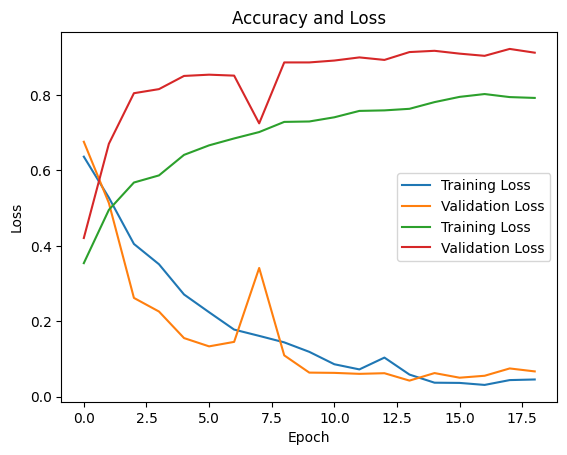

In [17]:

## Loss
# Plot training history
import matplotlib.pyplot as plt
plt.title("Accuracy and Loss")

plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()


plt.plot(history.history["accuracy"], label="Training Loss")
plt.plot(history.history["val_accuracy"], label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

# **Camera Testing**

In [18]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model

def main():
    # Load the pre-trained AI model
    model = load_model('classification_model.h5')

    # Create a VideoCapture object
    cap = cv2.VideoCapture(0)

    # Check if camera opened successfully
    if not cap.isOpened():
        print("Error: Failed to open camera.")
        return

    # Loop to continuously capture frames from the camera
    while True:
        # Capture frame-by-frame
        ret, frame = cap.read()

        # Check if frame is empty
        if not ret:
            print("Error: Failed to capture frame.")
            break

        # Preprocess the frame for prediction (resize, normalize, etc.)
        processed_frame = preprocess_frame(frame)  # Implement your preprocessing function here

        # Make prediction using the AI model
        prediction = model.predict(np.expand_dims(processed_frame, axis=0))

        # Display the prediction on the frame
        frame_with_prediction = display_prediction(frame, prediction)

        # Display the resulting frame
        cv2.imshow('Camera', frame_with_prediction)

        # Check for 'q' key to exit loop
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    # Release the VideoCapture object and close all windows
    cap.release()
    cv2.destroyAllWindows()

def preprocess_frame(frame):
    # Implement your preprocessing function here (resize, normalize, etc.)
    # Example: Resize frame to match model input size
    processed_frame = cv2.resize(frame, (100, 100))
    return processed_frame

def display_prediction(frame, prediction):
    # predicted_animal = convert_prediction_text(prediction)
    # Display prediction text on the frame
    label = "Prediction: " + str(prediction)
                                 
    cv2.putText(frame, label, (30, 75), cv2.FONT_HERSHEY_SIMPLEX, 0.3, (0, 255, 0), 1)
    return frame

def convert_prediction_text(prediction):
    hyena_label= [1, 0, 0]
    cheetah_label= [0, 1, 0]
    jaguar_label = [1, 1, 0]
    tiger_label = [0, 0, 1]
    hyena_threshold = 0.8
    cheetah_threshold = 0.8
    jaguar_threshold = 0.8
    tiger_threshold = 0.8
    if prediction.size == 1:
        # Handle the case where prediction is a scalar value
        prediction = np.array([prediction])
    if is_within_range(prediction[0], hyena_threshold, 1.0) and \
       is_within_range(prediction[1], 0.0, 1.0 - hyena_threshold) and \
       is_within_range(prediction[2], 0.0, 1.0 - hyena_threshold):
        return "Hyena"

    if is_within_range(prediction[0], 0.0, 1.0 - cheetah_threshold) and \
       is_within_range(prediction[1], cheetah_threshold, 1.0) and \
       is_within_range(prediction[2], 0.0, 1.0 - cheetah_threshold):
        return "Cheetah"

    if is_within_range(prediction[0], jaguar_threshold, 1.0) and \
       is_within_range(prediction[1], jaguar_threshold, 1.0) and \
       is_within_range(prediction[2], 0.0, 1.0 - jaguar_threshold):
        return "Jaguar"

    if is_within_range(prediction[0], 0.0, 1.0 - tiger_threshold) and \
       is_within_range(prediction[1], 0.0, 1.0 - tiger_threshold) and \
       is_within_range(prediction[2], tiger_threshold, 1.0):
        return "Tiger"

    return "Unknown"

def is_within_range(input_value, starting, ending):
    """
    Check if the input value is within the specified range.

    Parameters:
        input_value (int or float): The value to check.
        starting (int or float): The starting value of the range.
        ending (int or float): The ending value of the range.

    Returns:
        bool: True if input_value is within the range [starting, ending], False otherwise.
    """
    return np.all(np.logical_and(starting <= input_value, input_value <= ending))

if __name__ == "__main__":
    main()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━

# **Screen Testing**

In [ ]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
import pyautogui
import time
def main():
    # Load the pre-trained AI model
    model = load_model("classification_model.h5")  

    # Loop to continuously capture screen
    while True:
        time.sleep(2)
        # Capture screen image
        screen = capture_screen()
        cv2.imshow("Screen Capture", screen)
        # Preprocess the screen image for prediction
        processed_screen = preprocess_image(screen)

        # Make prediction using the AI model
        prediction = model.predict(np.expand_dims(processed_screen, axis=0))

        # Display prediction
        display_prediction(prediction)

def capture_screen():
    # Capture screen using pyautogui
    screen = pyautogui.screenshot()
    # Convert the screenshot to OpenCV format
    screen = np.array(screen)
    # Convert RGB to BGR (OpenCV uses BGR format)
    screen = cv2.cvtColor(screen, cv2.COLOR_RGB2BGR)
    return screen

def preprocess_image(image):
    # Implement your preprocessing function here
    # Example: Resize the image to match model input size
    processed_image = cv2.resize(image, (100, 100))
    return processed_image

def display_prediction(prediction):
    # Implement your function to display prediction
    # Example: Print prediction to the console
    print("Prediction:", prediction)

if __name__ == "__main__":
    main()


# **PREDICTING MODEL**

In [19]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

def preprocess_image(image_path):
    # Read the image
    image = cv2.imread(image_path)

    # Convert to RGB (if needed)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Normalize pixel values to be between 0 and 1
    image = image / 255.0

    # Resize the image to match the input shape expected by the model
    image = cv2.resize(image, (100, 100))

    # Expand the dimensions to match the input shape expected by the model
    image = np.expand_dims(image, axis=0)

    return image

def predict_image(model, image):
    # Perform prediction
    predictions = model.predict(image)

    return predictions

def plot_accuracy(predictions, actual_labels):
    predicted_labels = np.argmax(predictions, axis=1)
    actual_labels = np.argmax(actual_labels, axis=1)

    accuracy = np.mean(predicted_labels == actual_labels)

    plt.figure(figsize=(8, 6))
    plt.plot(predicted_labels, label='Predicted Labels')
    plt.plot(actual_labels, label='Actual Labels')
    plt.title(f'Accuracy: {accuracy:.2f}')
    plt.xlabel('Image Index')
    plt.ylabel('Class')
    plt.legend()
    plt.show()

def process_images_in_directory(model, directory):
    images = []
    labels = []

    for filename in os.listdir(directory):
        if filename.endswith(".jpg") or filename.endswith(".png"):
            image_path = os.path.join(directory, filename)
            image = preprocess_image(image_path)
            images.append(image)

            # Assuming labels are encoded in the filename or directory structure
            # Extract label from filename or directory name and encode it
            # Add your label encoding logic here
            # Example:
            if "cheetah" in filename:
                label = [0, 0]
            elif "hyena" in filename:
                label = [1, 0]
            elif "jaguar" in filename:
                label = [0, 1]
            elif "tiger" in filename:
                label = [1, 1]
            else:
                label = None  # Handle uncertain labels

            if label:
                labels.append(label)

    images = np.concatenate(images, axis=0)
    labels = np.array(labels)

    predictions = predict_image(model, images)

    plot_accuracy(predictions, labels)



In [20]:

# Example usage
process_images_in_directory(model, 'drive/MyDrive/Programming Related/data/cheetah_validation_resized')

process_images_in_directory(model, 'drive/MyDrive/Programming Related/data/jaguar_validation_resized')

process_images_in_directory(model, 'drive/MyDrive/Programming Related/data/tiger_validation_resized')

process_images_in_directory(model, 'drive/MyDrive/Programming Related/data/hyena_validation_resized')

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'drive/MyDrive/Programming Related/data/cheetah_validation_resized'

Initialize camera

In [ ]:
!pip install imageio

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode, b64encode
import numpy as np
import cv2
from PIL import Image, ImageDraw, ImageFont

In [ ]:
from google.colab import files
import cv2
import numpy as np

# Define a function to preprocess the uploaded image
def preprocess_image(image_path):
    # Read the image
    image = cv2.imread(image_path)

    # Convert to RGB (if needed)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Normalize pixel values to be between 0 and 1
    image = image / 255.0

    # Resize the image to match the input shape expected by the model
    image = cv2.resize(image, (100, 100))

    # Expand the dimensions to match the input shape expected by the model
    image = np.expand_dims(image, axis=0)

    return image

# Upload the image file
uploaded = files.upload()

# Get the filename of the uploaded image
image_path = next(iter(uploaded))

# Preprocess the uploaded image
processed_image = preprocess_image(image_path)

# Make predictions using your model
predictions = model.predict(processed_image)

# Display the prediction results
print("Predictions:", predictions)

x = predictions[0][0]
y = predictions[0][1]

class_labels = {
    (0, 0): "Cheetah",
    (1, 0): "Hyena",
    (0, 1): "Jaguar",
    (1, 1): "Tiger"
}

if x < 0.5:
    if y < 0.5:
        label = class_labels[(0, 0)]
    else:
        label = class_labels[(0, 1)]
else:
    if y < 0.5:
        label = class_labels[(1, 0)]
    else:
        label = class_labels[(1, 1)]

print("Classified as:", label)
# # Define the class labels
# class_labels = {
#     (0, 0): "Cheetah",
#     (1, 0): "Hyena",
#     (0, 1): "Jaguar",
#     (1, 1): "Tiger"
# }

# # Compare predictions with label values and print corresponding class name
# for pred in predictions:
#     print("Current prediction:", pred)
#     for label, class_name in class_labels.items():
#         print("Current label:", label)
#         if np.array_equal(pred, label):
#             print("Predicted class:", class_name)
#             break


Saving tiger_883_resized.jpg to tiger_883_resized (1).jpg
1/1 [==============================] - 0s 36ms/step
Predictions: [[0.99960625 0.8786664 ]]
Classified as: Tiger
